In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [35]:
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


<h1>Part 1</h1>

Crosstab Analysis:

Create a crosstab between the product category and the isBestSeller status.

- Are there categories where being a best-seller is more prevalent?

Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.


In [38]:
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])

df_crosstab_result = crosstab_result.reset_index()
df_crosstab_result

isBestSeller,category,False,True
0,3D Printers,247,1
1,3D Printing & Scanning,4065,2
2,Abrasive & Finishing Products,245,5
3,Action Cameras,1696,1
4,Adapters,251,3
...,...,...,...
291,Wind Instruments,243,7
292,Window Treatments,234,5
293,Women,17559,213
294,Women's Sports & Outdoor Shoes,1939,20


In [39]:
df_crosstab_result["prevalence"] = df_crosstab_result[True] / (df_crosstab_result[False] + df_crosstab_result[True]) * 100
df_crosstab_result.sort_values(by="prevalence", ascending = False)

isBestSeller,category,False,True,prevalence
109,Grocery,9008,556,5.813467
254,Smart Home Security & Lighting,98,6,5.769231
126,Health & Personal Care,9017,552,5.768628
185,Mobile Phone Accessories,248,11,4.247104
229,Power & Hand Tools,8353,306,3.533895
...,...,...,...,...
38,"CD, Disc & Tape Players",8798,0,0.000000
103,General Music-Making Accessories,259,0,0.000000
259,Snowboard Boots,1449,0,0.000000
33,Boxes & Organisers,911,0,0.000000


Statistical Tests:

- Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
- Compute Cramér's V to understand the strength of association between best-seller status and category.

In [41]:
from scipy.stats import chi2_contingency

# Chi-square test for 'category' and 'isBestSeller'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(36540.20270061387, 0.0)

In [42]:
from scipy.stats.contingency import association

# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(crosstab_result, method="cramer")

0.1222829439760564

Visualizations:

Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

<Axes: xlabel='category'>

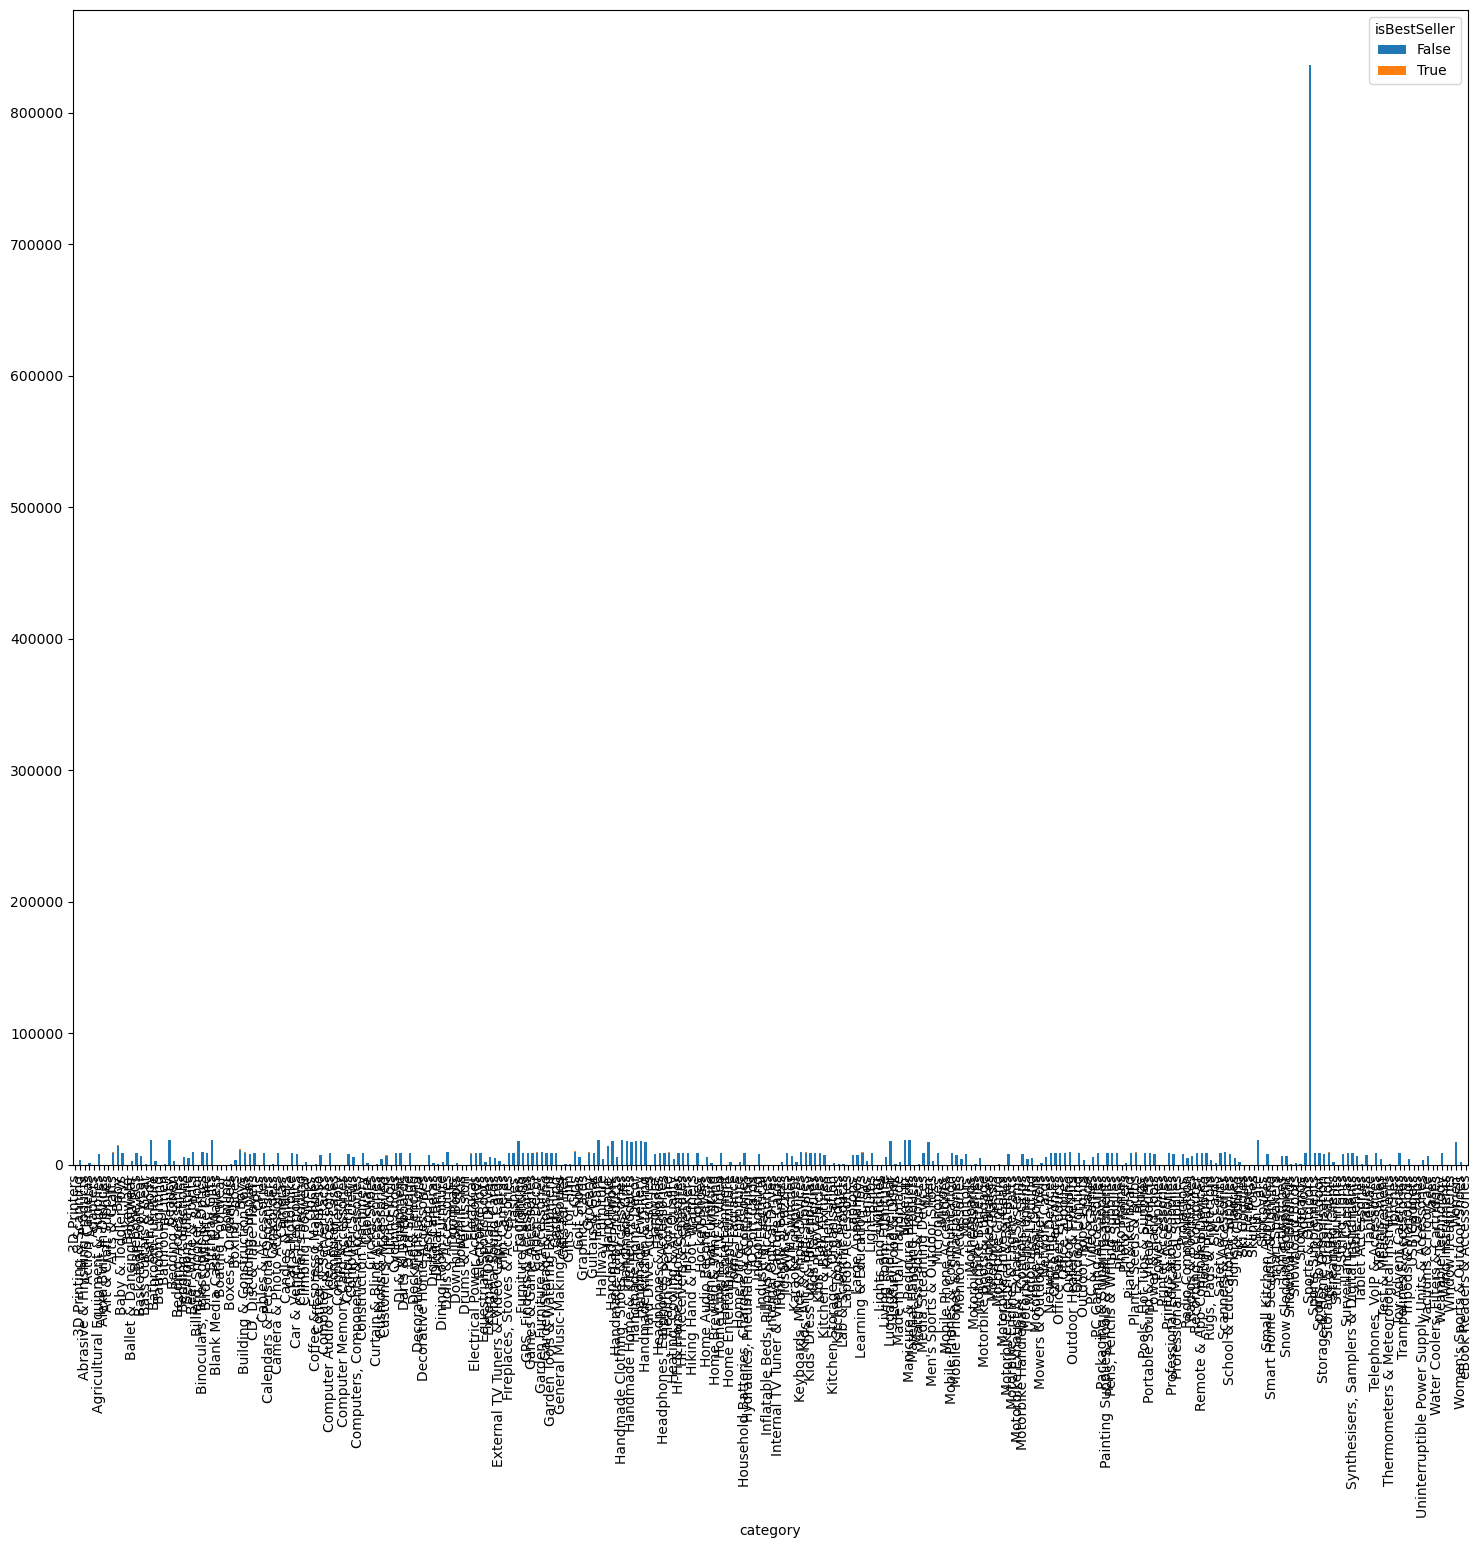

In [44]:
# Plotting a stacked bar chart for the 'crosstab_result' data
crosstab_result.plot(kind="bar", stacked=True,figsize=(18, 15))

<h1>Part 2</h1>

Preliminary Step: Remove outliers in product prices.

For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

In [47]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

In [48]:
data_series = df['price']  
outliers = tukeys_test_outliers(data_series)
print(outliers)

10         139.00
19         164.99
25         149.99
28         289.00
31         199.99
            ...  
2443619    166.99
2443627    152.58
2443638    108.77
2443641    166.99
2443643    158.99
Name: price, Length: 327688, dtype: float64


In [49]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
    
# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
df_no_outliers

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


Violin Plots:

- Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
- Which product category tends to have the highest median price? Don't filter here by top categories.

In [51]:
df["category"].value_counts().head(20).reset_index().iloc[:,0].tolist()

['Sports & Outdoors',
 'Beauty',
 'Handmade Clothing, Shoes & Accessories',
 'Bath & Body',
 'Birthday Gifts',
 'Manicure & Pedicure Products',
 'Skin Care',
 'Make-up',
 'Hair Care',
 'Fragrances',
 'Handmade Gifts',
 'Handmade Home Décor',
 'Luggage and travel gear',
 'Handmade Jewellery',
 'Handmade Artwork',
 'Women',
 'Handmade Home & Kitchen Products',
 'Handmade Kitchen & Dining',
 'Men',
 'Baby']

In [52]:
top_20_categories = df_no_outliers["category"].value_counts().head(20).reset_index().iloc[:, 0].tolist()
df_filtered = df_no_outliers[df_no_outliers["category"].isin(top_20_categories)]
df_filtered

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
19513,21072,B09477KHQ3,"Personalised Birthday Print Gift ""THE YEAR YOU...",4.5,763,7.99,False,900,Handmade Home & Kitchen Products
19514,21073,B0BSRFQYG8,Wax Melts 4 Bars | Build Your Own Box (Choose ...,3.9,117,6.49,True,800,Handmade Home & Kitchen Products
19515,21074,B09N9GVHV9,"Personalised Birthday Print Gift ""ON THE DAY/Y...",4.6,1155,8.99,True,600,Handmade Home & Kitchen Products
19516,21075,B0BRYGV7PQ,Fresh Wax Melts - Laundry Type Wax Melts - Str...,4.5,56,4.99,True,500,Handmade Home & Kitchen Products
19517,21076,B0B1JHB28R,Manta Makes Work Leaving Gifts | I Used to Wor...,4.7,261,9.95,True,400,Handmade Home & Kitchen Products
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


/var/folders/gk/c2gpqh3x7z74jf883m6p8r3c0000gn/T/ipykernel_84486/2830761262.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_filtered, x="category", y='price', palette="coolwarm")


<Axes: xlabel='category', ylabel='price'>

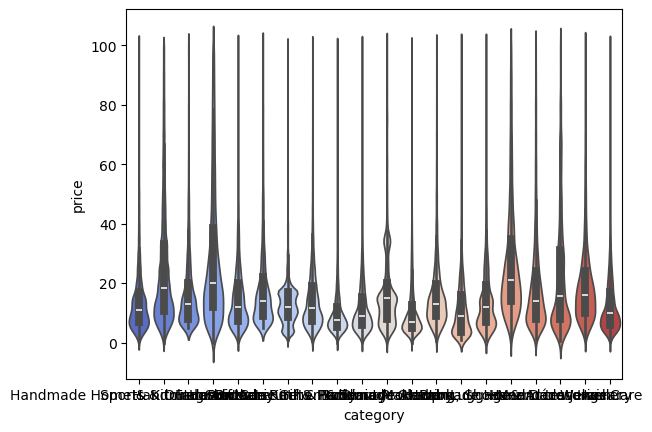

In [53]:
sns.violinplot(data=df_filtered, x="category", y='price', palette="coolwarm")

In [54]:
df_category_price = df.groupby("category").agg({"price":"median"}).reset_index()
df_category_price.sort_values("price", ascending = False)

,category,price
165,Laptops,1042.725
75,Desktop PCs,810.400
260,Snowboards,366.725
134,Home Audio Record Players,326.080
0,3D Printers,319.000
...,...,...
4,Adapters,7.050
176,Make-up,7.000
246,Signs & Plaques,6.990
8,Arts & Crafts,5.990


Bar Charts:

- Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
- Which product category commands the highest average price? Don't filter here by top categories.

In [56]:
top_10_categories = df_no_outliers["category"].value_counts().head(10).reset_index().iloc[:, 0].tolist()
df_filtered_10 = df_no_outliers[df_no_outliers["category"].isin(top_10_categories)]


/var/folders/gk/c2gpqh3x7z74jf883m6p8r3c0000gn/T/ipykernel_84486/2664565774.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_filtered_10, x='category', y='price', palette="coolwarm")


<Axes: xlabel='category', ylabel='price'>

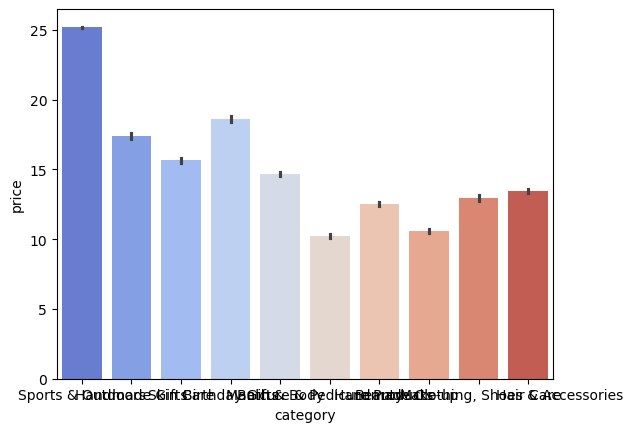

In [57]:
sns.barplot(data=df_filtered_10, x='category', y='price', palette="coolwarm")

Box Plots:

- Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
- Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

/var/folders/gk/c2gpqh3x7z74jf883m6p8r3c0000gn/T/ipykernel_84486/110728208.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered_10, x='category', y='stars', palette="coolwarm")


<Axes: xlabel='category', ylabel='stars'>

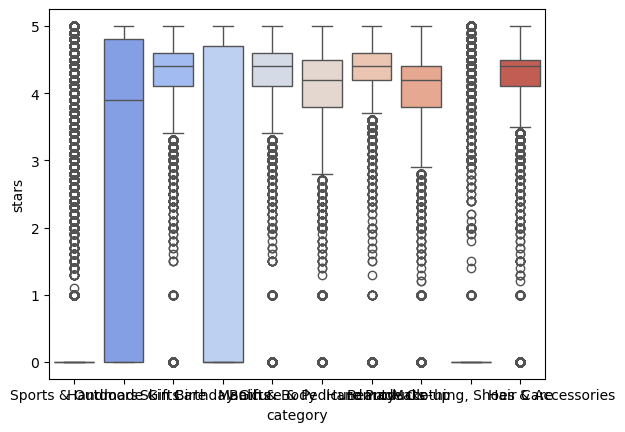

In [59]:
sns.boxplot(data=df_filtered_10, x='category', y='stars', palette="coolwarm")

In [60]:
df_category_price = df.groupby("category").agg({"stars":"median"}).reset_index()
df_category_price.sort_values("stars", ascending = False)

,category,stars
56,Computer Memory,4.7
132,Hobbies,4.6
25,"Beer, Wine & Spirits",4.6
164,Laptop Accessories,4.6
157,Kids' Play Figures,4.6
...,...,...
152,KVM Switches,0.0
153,Karaoke Equipment,0.0
163,Lab & Scientific Products,0.0
165,Laptops,0.0


<h1>Part 3</h1>

Correlation Coefficients:

- Calculate the correlation coefficient between price and stars.
- Is there a significant correlation between product price and its rating?

In [63]:
# Calculating the Pearson correlation coefficient
p_correlation = df['stars'].corr(df['price'])
p_correlation

-0.12490673262148384

In [64]:
# Calculating the Spearman rank correlation 
s_correlation = df['stars'].corr(df['price'], method='spearman')
s_correlation

-0.13316425462433876

In [65]:
crosstab_result = pd.crosstab(df['stars'], df['price'])
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(2360775.9662013454, 1.0)

Visualizations:

- Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
- Use a correlation heatmap to visualize correlations between all numerical variables.
- Examine if product prices typically follow a normal distribution using a QQ plot.


<Axes: xlabel='price', ylabel='stars'>

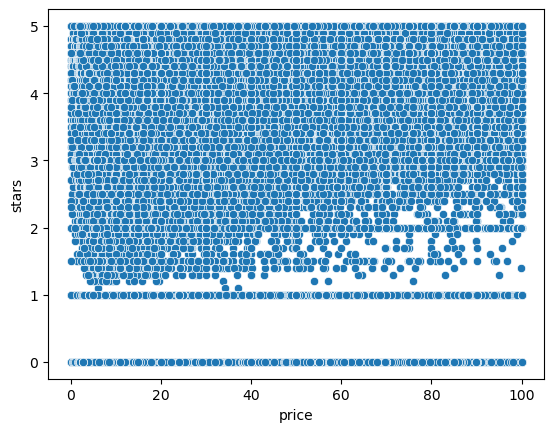

In [96]:
sns.scatterplot(data=df_no_outliers, x='price', y='stars')

<Axes: xlabel='price', ylabel='stars'>

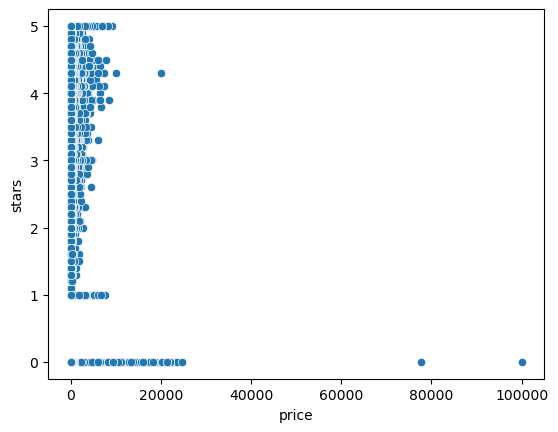

In [98]:
sns.scatterplot(data=df, x='price', y='stars')

In [68]:
# DF without 0 values
df_no_0 = df[(df.T != 0).any()]

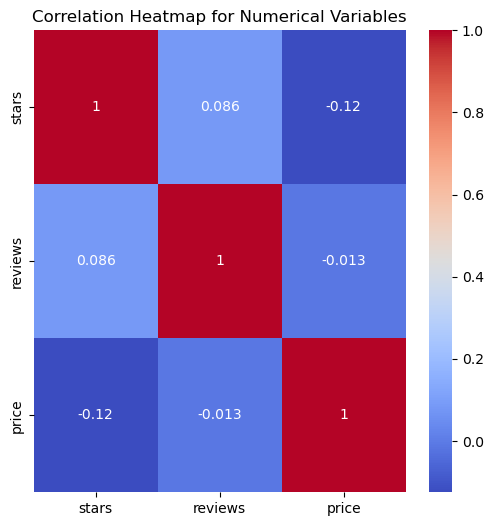

In [69]:
correlation_matrix = df.drop(columns=["uid", "asin", "title", "category", "isBestSeller", "boughtInLastMonth"]).corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(6, 6))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Numerical Variables")
plt.show()

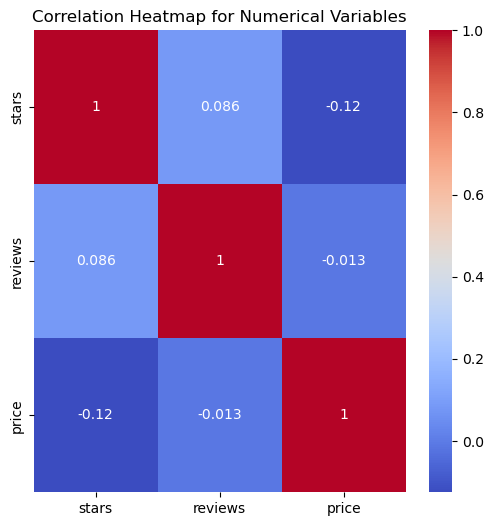

In [106]:
correlation_matrix_no = df_no_outliers.drop(columns=["uid", "asin", "title", "category", "isBestSeller", "boughtInLastMonth"]).corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(6, 6))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Numerical Variables")
plt.show()

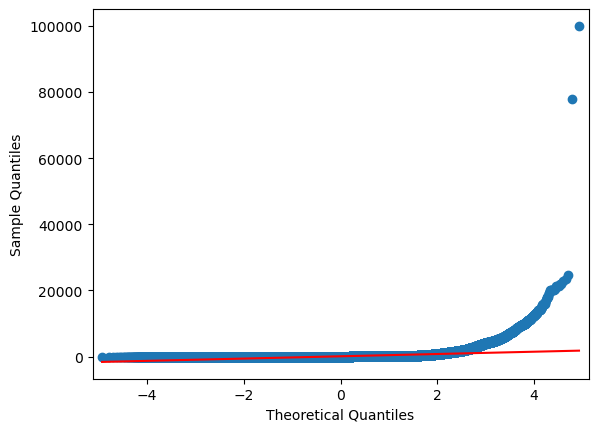

In [100]:
import statsmodels.api as sm

# Generating a Q-Q plot for 'price' to check if its distribution follows a normal distribution
sm.qqplot(df['price'], line='s');

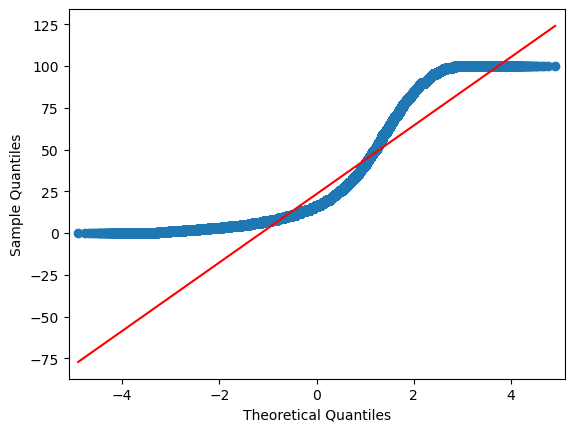

In [102]:
sm.qqplot(df_no_outliers['price'], line='s');